In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import glob
import os
import numpy as np
from PIL import Image
import torchvision.models as models
import imageio
from tqdm import tqdm
# from torchsummary import summary
import matplotlib.pyplot as plt
from pytorch_pretrained_vit import ViT
import cv2

In [2]:
from transformers import ViTFeatureExtractor, ViTModel
from PIL import Image
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k', output_attentions=True)



In [3]:
img1 = Image.open("hw3_data/p1_data/val/26_5064.jpg")
img2 = Image.open("hw3_data/p1_data/val/29_4718.jpg")
img3 = Image.open("hw3_data/p1_data/val/31_4838.jpg")

In [8]:
def att_map(img):
    inputs = feature_extractor(images=img, return_tensors="pt")
    outputs = model(**inputs)
    att_mat = outputs.attentions[-2].squeeze(0)
    query, keys = att_mat[:,:1,:], att_mat[:,1:,:].permute(0,2,1)
    att = torch.matmul(query, keys).squeeze(1).mean(dim=0)
    print(att.shape)
    return np.reshape(att.detach().cpu().numpy(),(14,14))

def plot_att_map(ori, att):
    img_h, img_w = ori.size[0], ori.size[1]

    mask = cv2.resize(att, (img_h, img_w))
    normed_mask = mask / mask.max()
    normed_mask = (normed_mask * 255).astype('uint8')

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 16))
    ax1.set_title('Original')
    ax2.set_title('attention map')

    _ = ax1.imshow(ori)
    _ = ax1.axis('off')

    _ = ax2.imshow(ori, alpha=1)
    _ = ax2.axis('off')
    _ = ax2.imshow(normed_mask, alpha=0.5, interpolation='nearest', cmap="jet")

torch.Size([196])


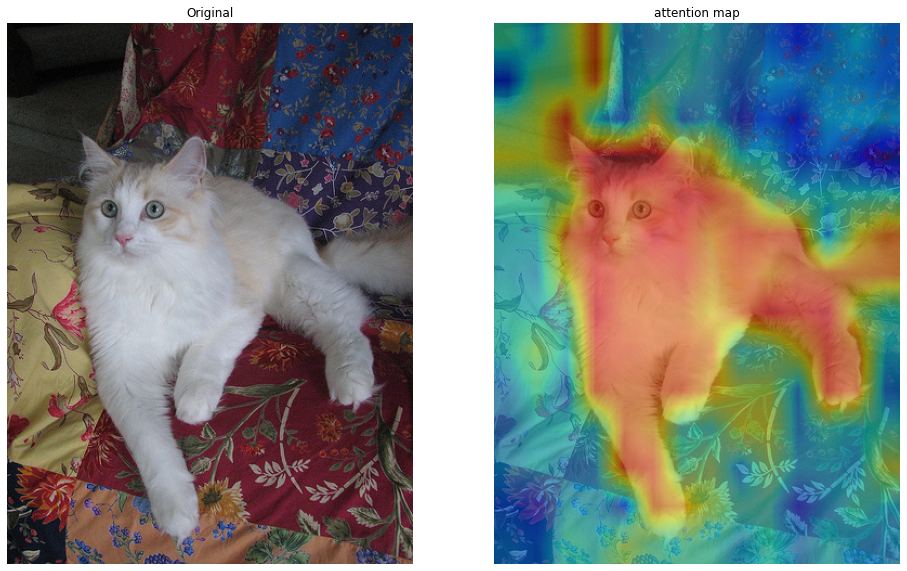

In [9]:
plot_att_map(img1,att_map(img1))

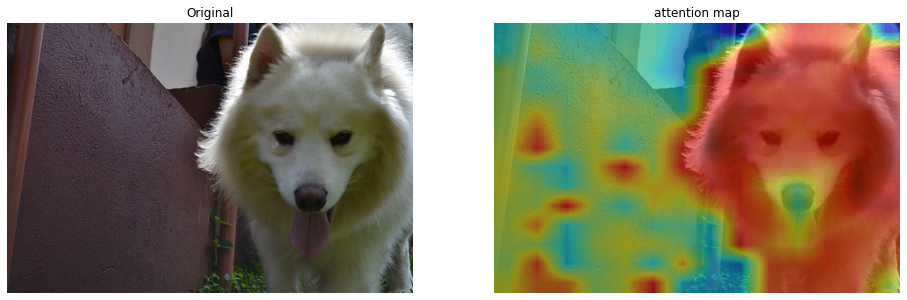

In [23]:
plot_att_map(img2,att_map(img2))

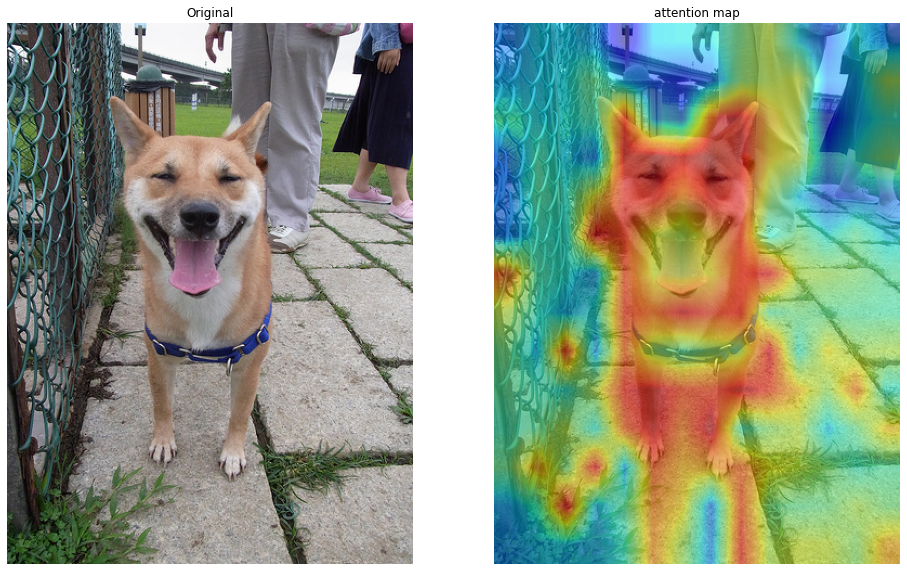

In [24]:
plot_att_map(img3,att_map(img3))